In [1]:
import sid
import standardmodel as sm
import constants as c
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

# Dodelson Widrow Comparison

In [20]:
# Parameters
theta = 10**-3
ms = 1e-6
Tfinal = 0.1
flavor = 'tau'
antineutrino=False
Ti = 10*sid.Tmax(ms)
T_domain = np.logspace(np.log10(Ti), np.log10(Tfinal), 100)

In [2]:
# Differences in the production rate

y = 1 #p/Tfinal

integrand = -1*sid.boltzmann_integrand_T(T_domain, y, Tfinal, theta, ms, flavor, antineutrino, simplify=False)
integrand_DW = -1*sid.boltzmann_integrand_T(T_domain, y, Tfinal, theta, ms, flavor, antineutrino, simplify='DW')
plt.loglog(T_domain, integrand, label='Full Calculation')
plt.loglog(T_domain, integrand_DW, label='DW Approximation')
plt.xlabel(r'T (MeV)')
plt.ylabel(r"$df_s/dT$")
# flip the x axis
plt.gca().invert_xaxis()
plt.show()

NameError: name 'T_domain' is not defined

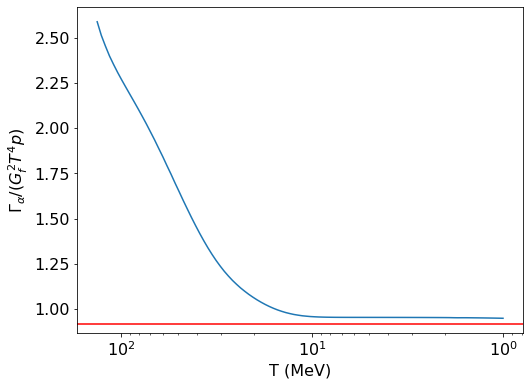

In [10]:
# Differences in the active neutrino scattering rate
poverT = 1

plt.figure(figsize=(8,6))
rate = sid.active_scattering_rate(poverT*T_domain, T_domain, flavor, simplify=False)/(c.Gf**2*T_domain**5*poverT)
plt.plot(T_domain, rate, label='Full Calculation')
plt.axhline(7*np.pi/24, label='DW rate', c='r')
plt.ylabel(r"$\Gamma_\alpha /(G_f^2 T^4 p)$")
plt.xlabel(r'T (MeV)')
plt.gca().invert_xaxis()
plt.xscale('log')
plt.show()

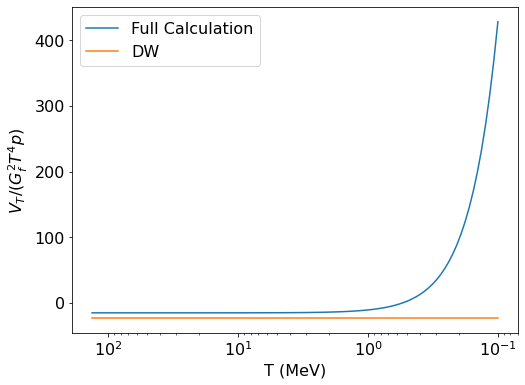

In [22]:
# Differences in the matter potential
poverT = 1

plt.figure(figsize=(8,6))
Vthermal = sid.matter_potential(poverT*T_domain, T_domain, flavor, antineutrino)
Vthermal_DW = sid.matter_potential(poverT*T_domain, T_domain, flavor, antineutrino, simplify='DW')
#Vthermal_DW_constant = -(7*np.pi/24)*4*np.sin(2*c.thetaW)**2/(15*c.fine_structure)
plt.plot(T_domain, Vthermal/(c.Gf**2*T_domain**5*poverT), label=r'Full Calculation')
plt.plot(T_domain, Vthermal_DW/(c.Gf**2*T_domain**5*poverT), label=r'DW')
plt.ylabel(r'$V_T/(G_f^2 T^4 p)$')
plt.xlabel(r'T (MeV)')
plt.gca().invert_xaxis()
plt.xscale('log')
plt.legend()
plt.show()

 Solve the boltzmann equation to get the final distribution function

In [15]:
poverT_domain = np.linspace(0.25, 5, 100)
fs_boltzmann_DW, fs_boltzmann = [], []
for y in poverT_domain:
    fs_boltzmann_DW.append(sid.boltzmann_solve(y, Ti, Tfinal, theta, ms, flavor, antineutrino, simplify='DW')[0])
    fs_boltzmann.append(sid.boltzmann_solve(y, Ti, Tfinal, theta, ms, flavor, antineutrino, simplify=False)[0])

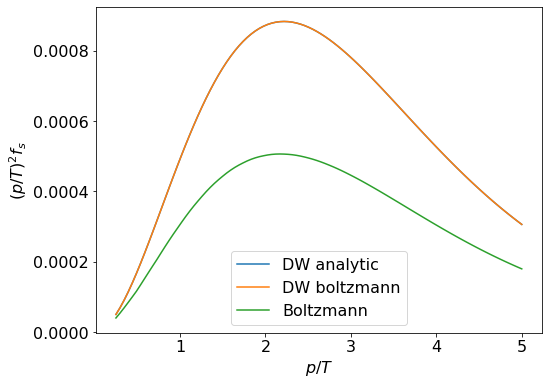

In [18]:
# Analytic solution, equation 9 in DW
def fs_DW(poverT, gstar, theta, M):
    """M in MeV. Small theta approximation, theta = mu/M"""
    return (6/np.sqrt(gstar))*10**9*M*theta**2*sid.fermi_dirac(poverT*1, 1)
gstar = sm.compute_SM_relativistic_dof_approx(Tfinal)


plt.figure(figsize=(8,6))
plt.plot(poverT_domain, poverT_domain**2*fs_DW(poverT_domain, gstar, theta, ms), label='DW analytic')
plt.plot(poverT_domain, poverT_domain**2*fs_DW(poverT_domain, gstar, theta, ms), label='DW boltzmann')
plt.plot(poverT_domain, poverT_domain**2*fs_boltzmann, label='Boltzmann')
plt.xlabel(r'$p/T$')
plt.ylabel(r'$(p/T)^2 f_s$')
plt.legend()
plt.show()